In [1]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import numpy as np

In [2]:
direccion_servidor = 'LAPTOP-2R1SCPJG\SQLEXPRESS'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("\n"*2)
    print("conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)




conexión exitosa


In [3]:
dFechaInicio = '2019-01-01'
dFechaFin = '2019-12-31'

In [4]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            #df = pd.DataFrame((tuple(t) for t in rows)) 
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            #cursor.close()
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

## Clima

In [5]:
data_weather = pd.ExcelFile('D:/bibliografia de tesis/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [6]:
df_weather = df_weather[df_weather['Año'] == 2019]

In [7]:
df_weather.reset_index(drop = True, inplace = True)

In [8]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [9]:
arrFiltrados = df['Filtrado'].unique()

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1030
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


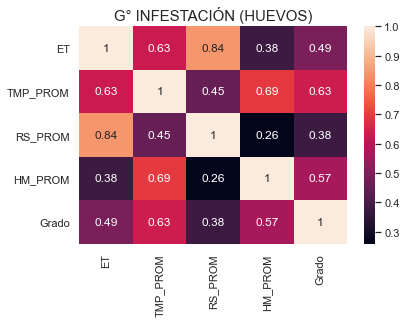

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1030
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


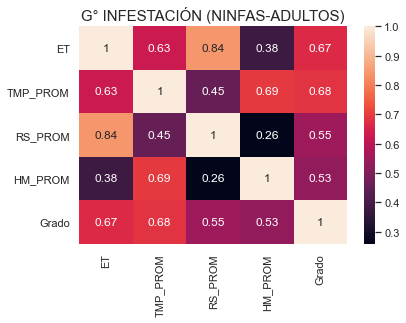

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1006
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


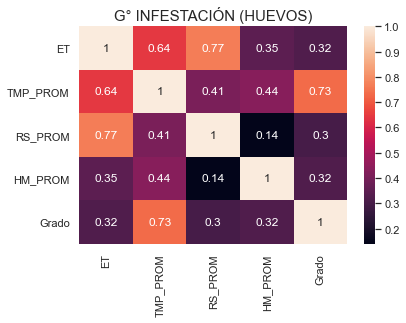

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1006
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


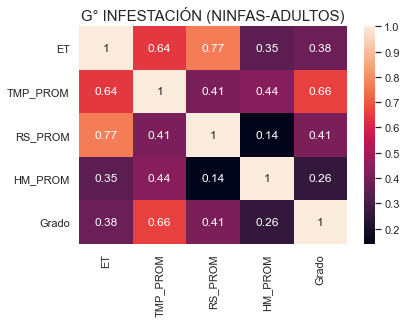

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


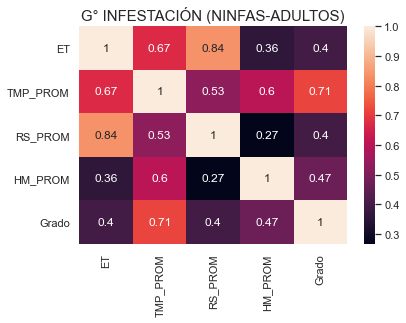

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


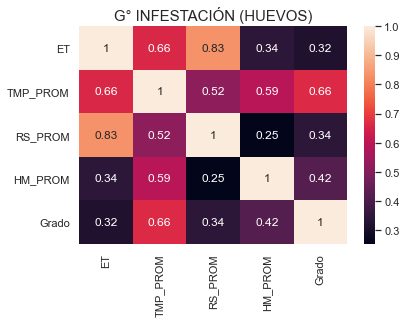

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1012
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


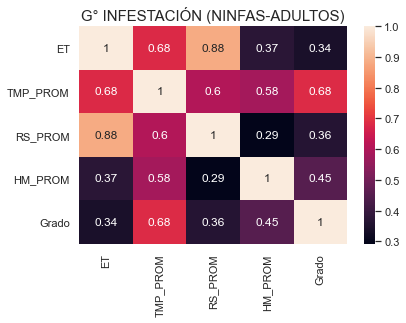

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1012
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


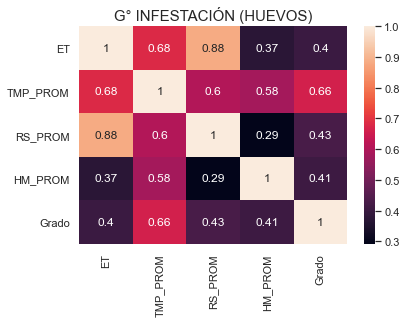

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1009
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


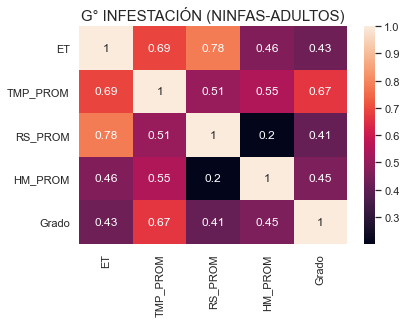

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1009
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


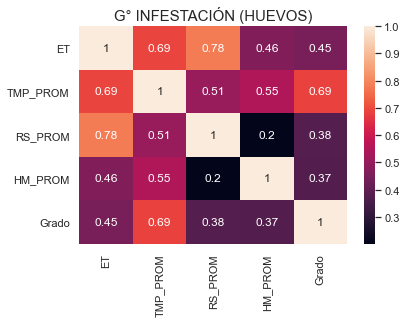

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1011
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


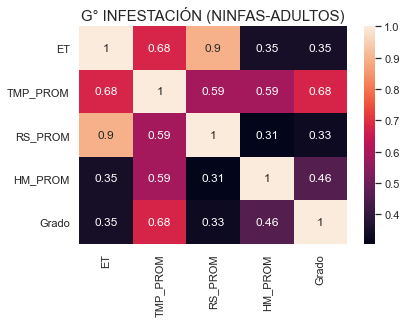

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


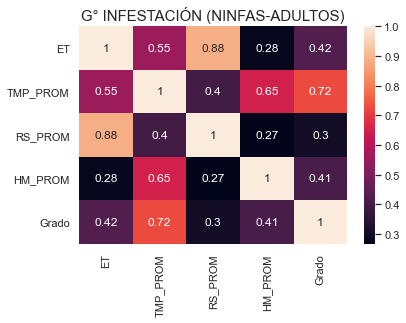

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1029
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


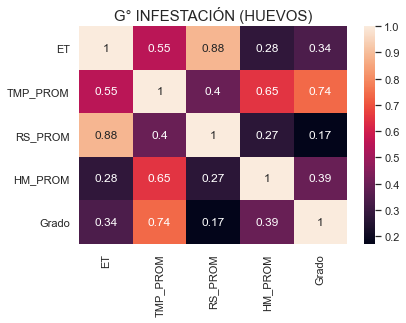

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


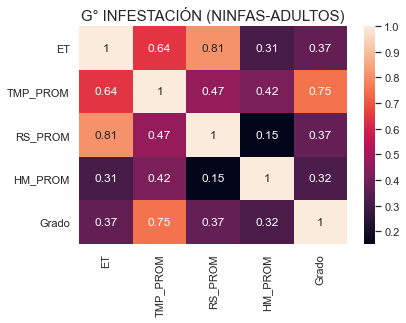

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


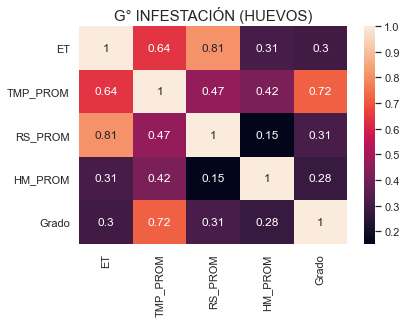

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


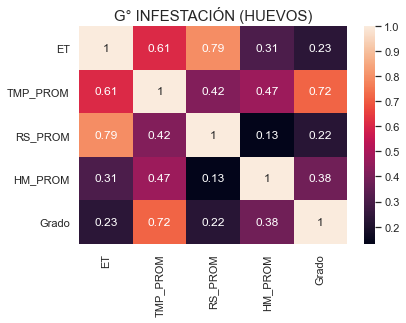

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


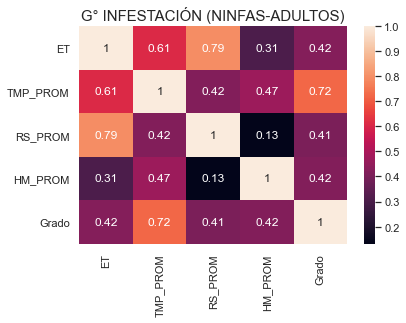

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1028
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


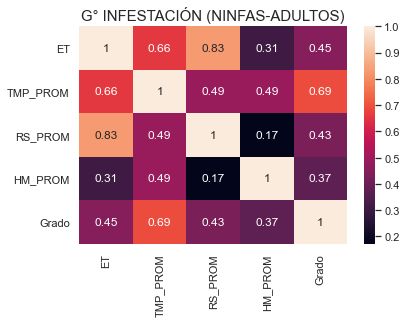

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1028
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


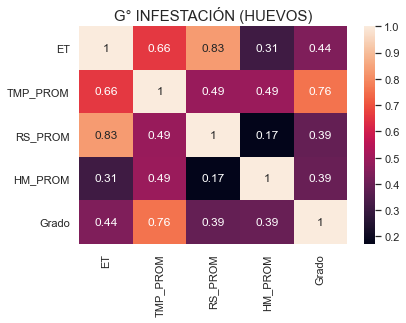

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


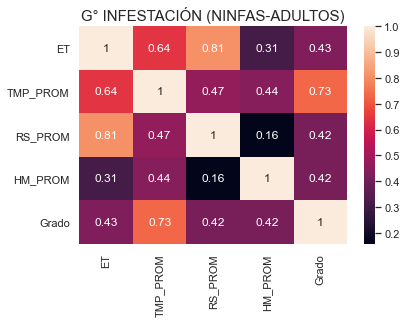

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


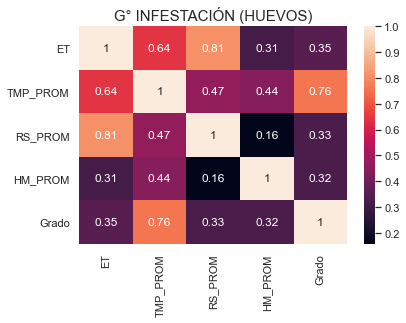

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


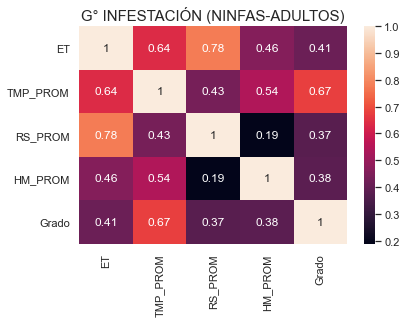

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


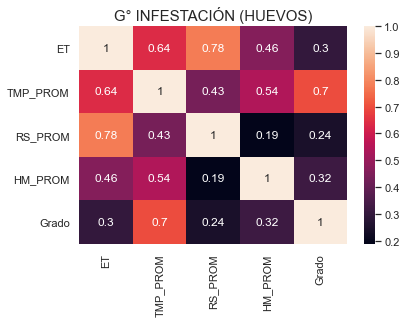

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1016
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


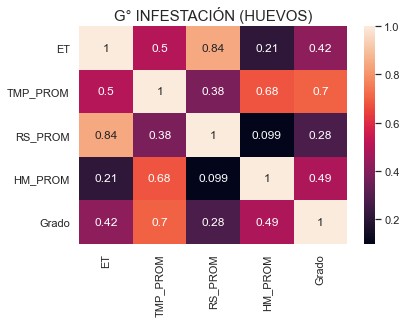

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


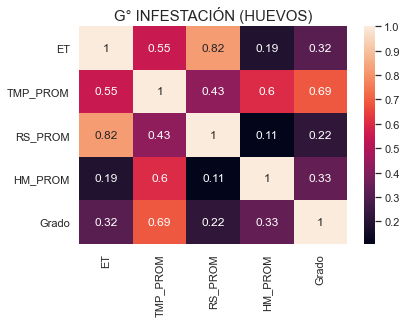

------------------------------------------------------------
Lugar: Filtrado 10N - Turno F10N - Lote 1017
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


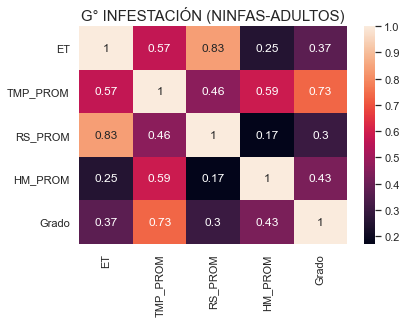

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1139
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


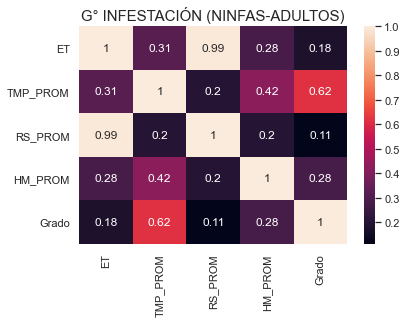

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1158
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


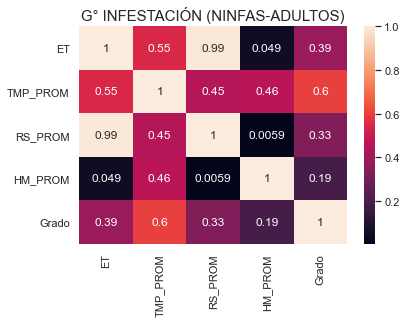

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1148
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


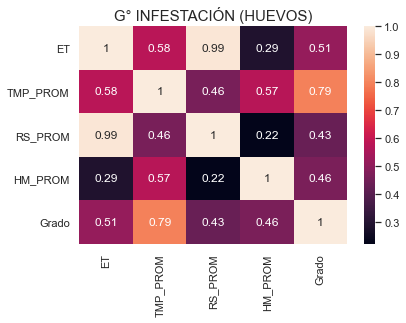

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1148
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


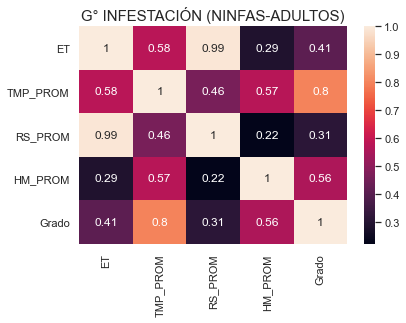

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1143
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


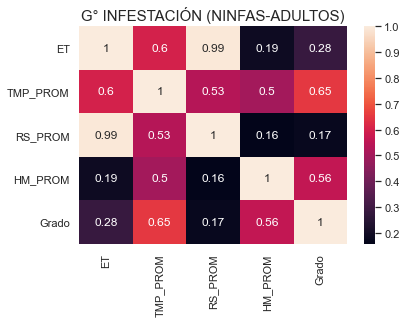

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1143
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


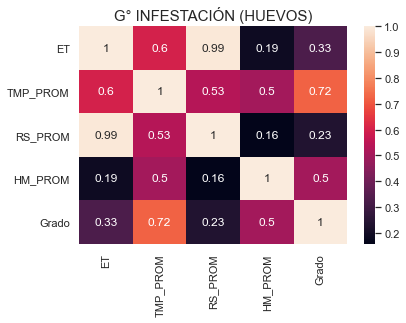

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1156
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


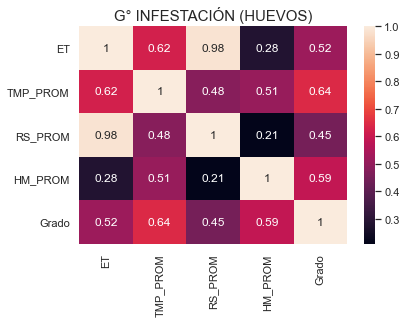

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1146
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


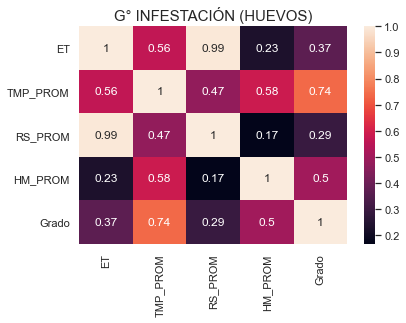

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1146
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


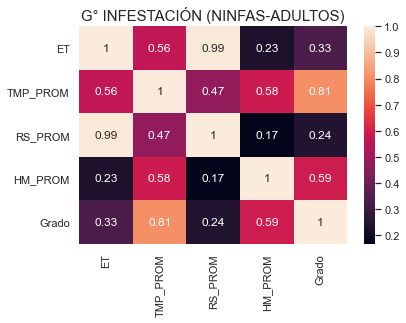

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1154
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


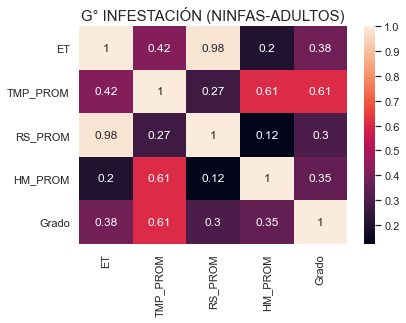

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1151
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


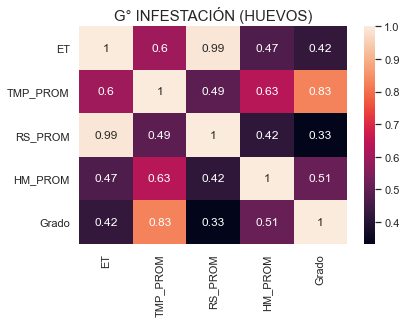

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1151
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


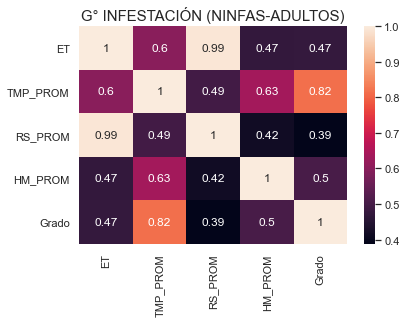

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1155
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


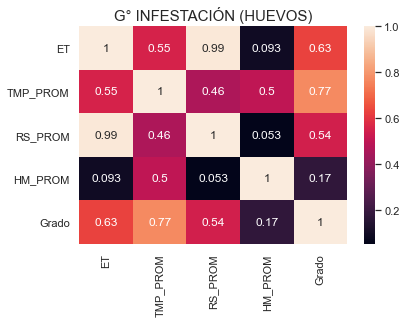

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1155
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


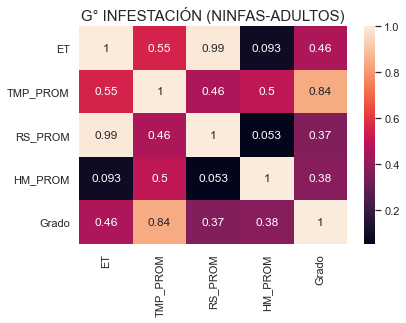

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1157
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


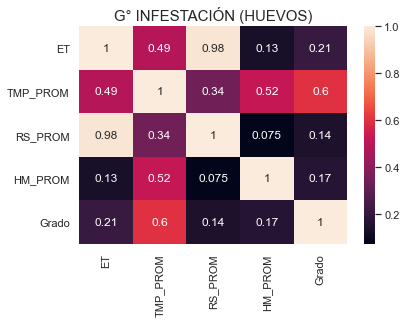

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1153
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


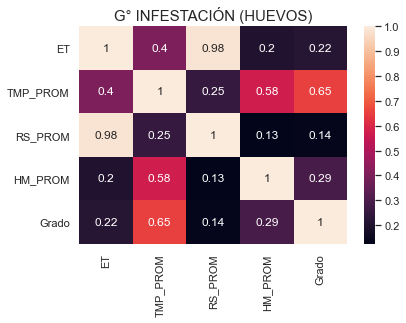

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1147
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


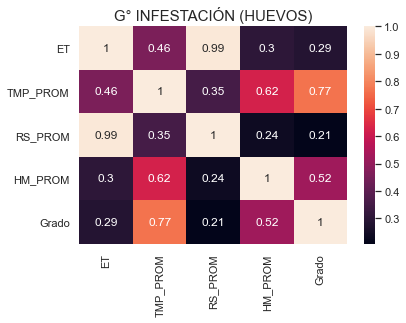

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1147
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


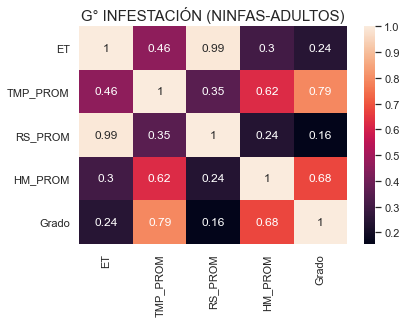

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1145
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


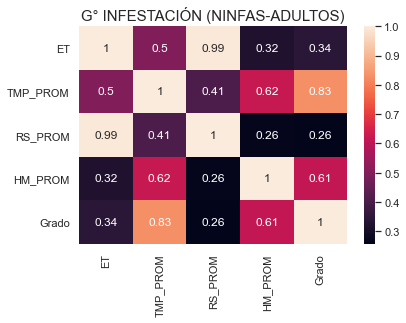

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1145
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


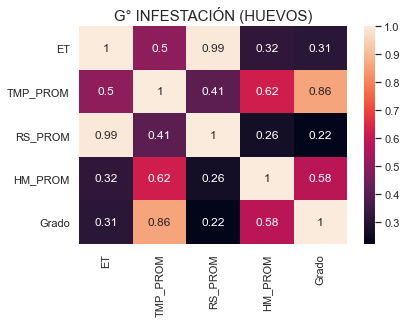

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1159
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


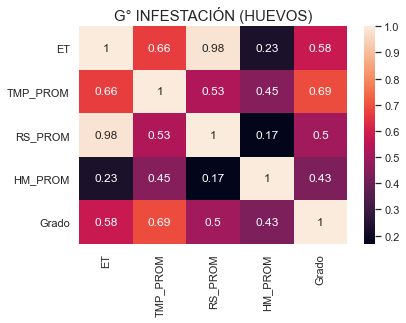

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1160
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


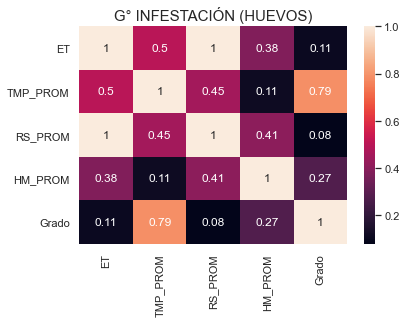

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1144
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


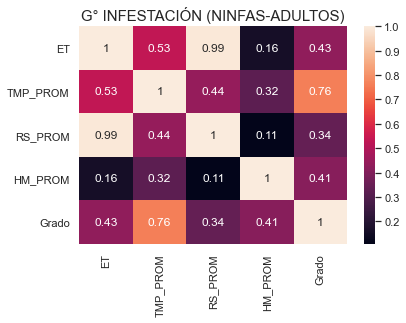

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1144
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


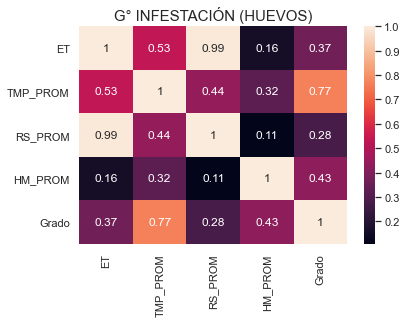

------------------------------------------------------------
Lugar: Filtrado 11N - Turno T00 - Lote 1152
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


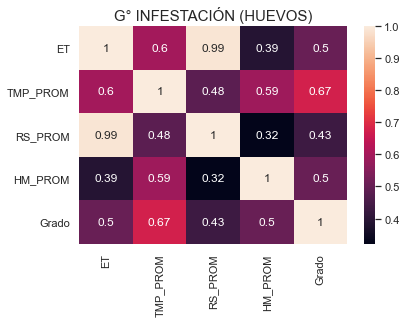

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1307
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


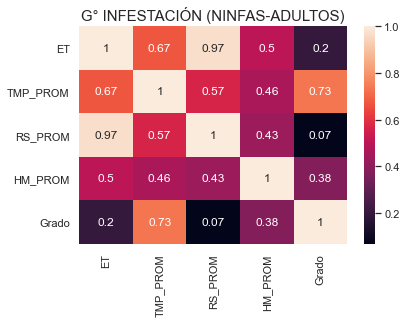

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1307
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


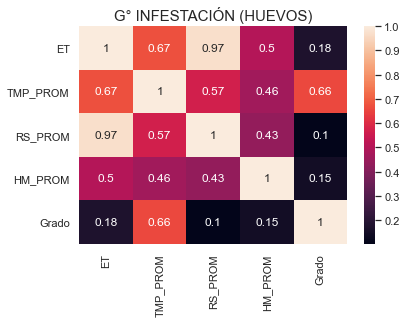

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1308
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


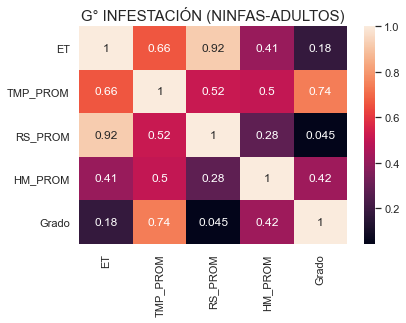

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1306
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


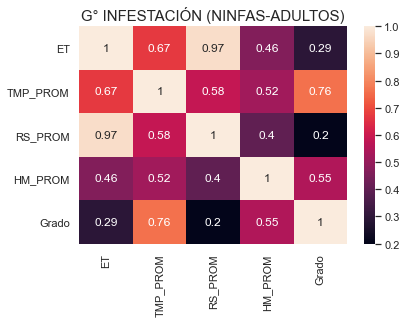

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1315
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


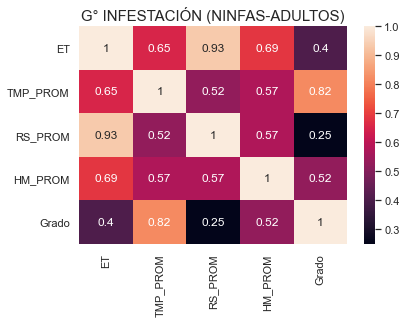

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1315
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


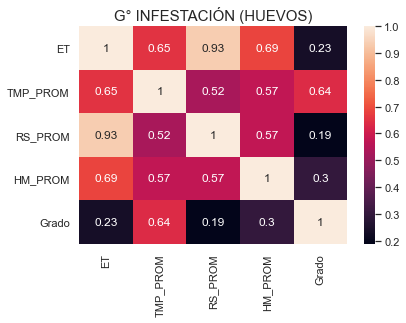

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1320
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


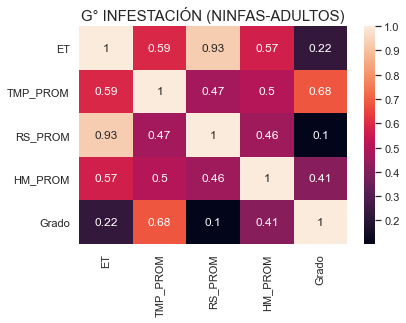

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1320
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


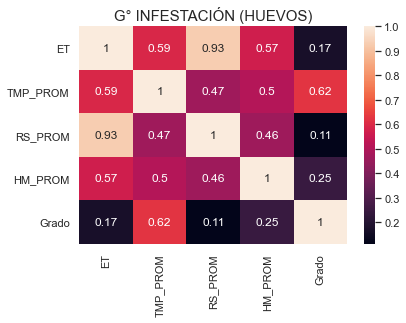

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1309
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


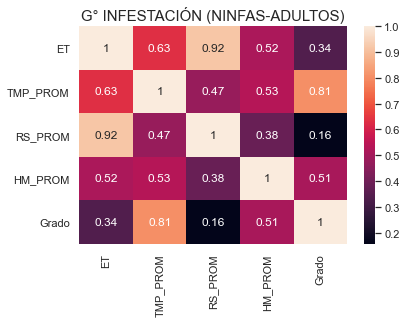

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1309
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


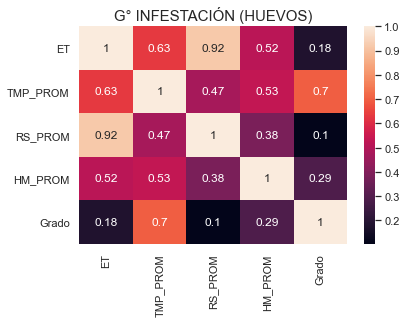

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1304
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


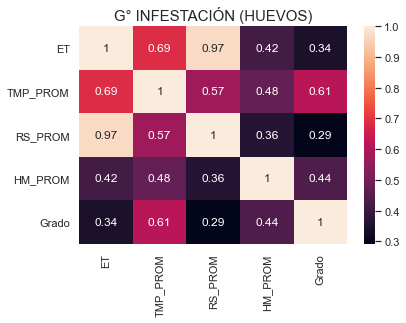

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1304
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


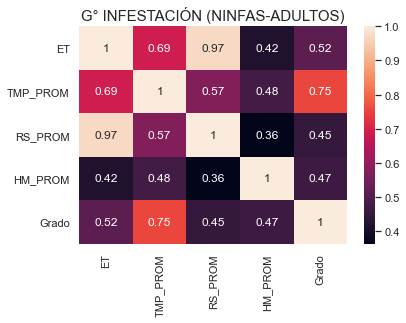

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1319
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


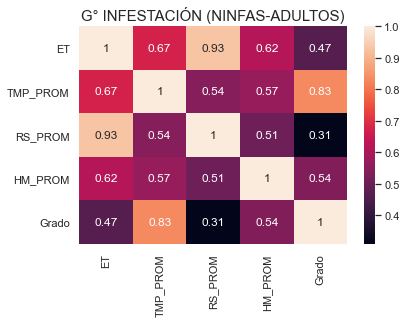

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1317
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


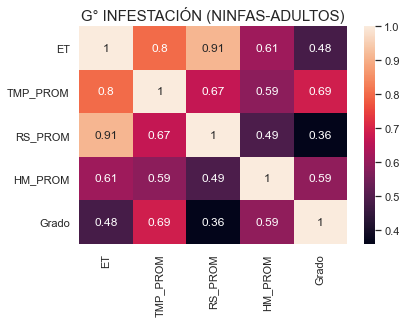

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1302
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


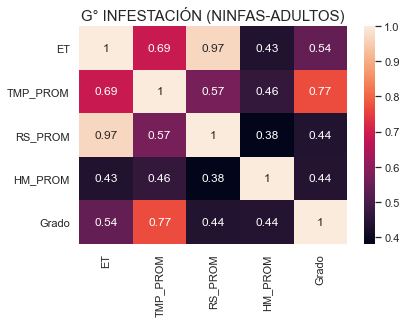

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1302
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


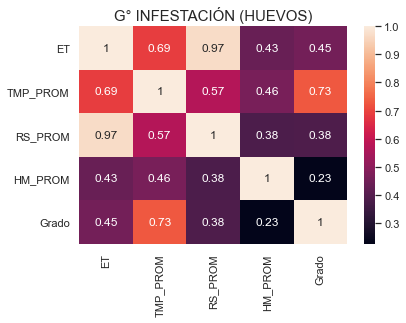

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1301
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


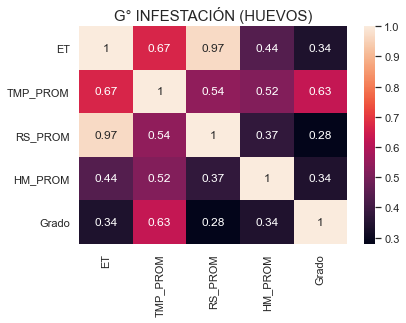

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1301
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


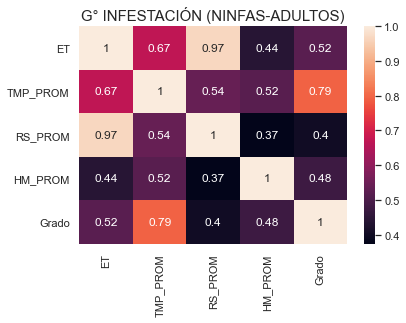

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1321
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


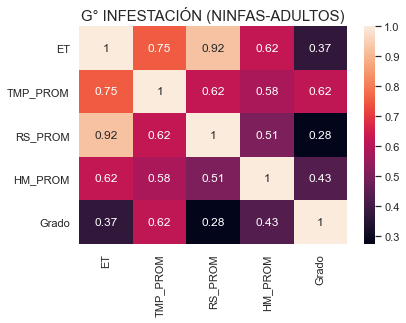

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1314
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


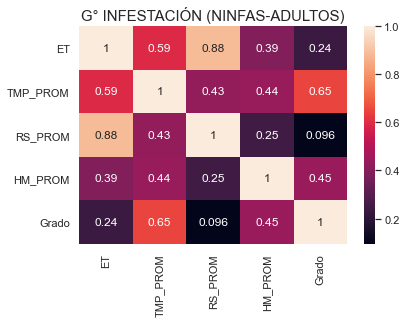

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1316
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


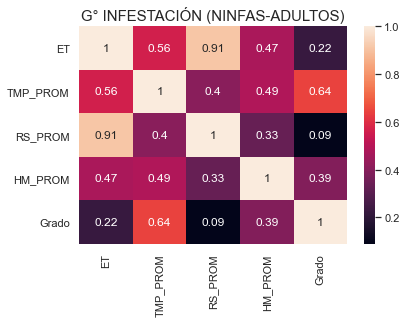

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1312
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


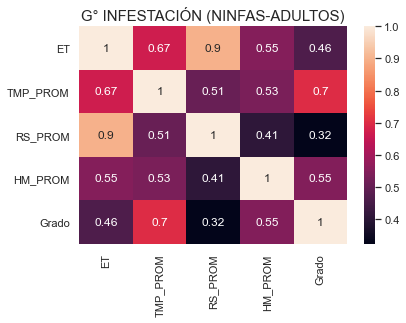

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1310
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


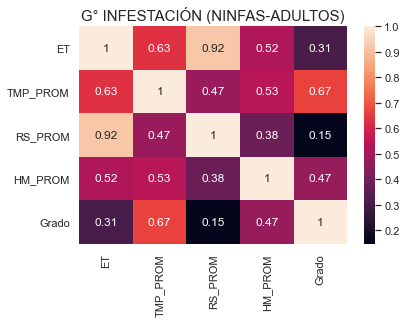

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1305
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


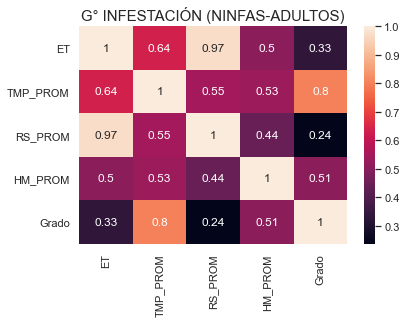

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1303
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


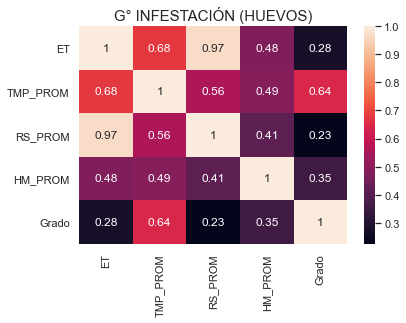

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1303
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


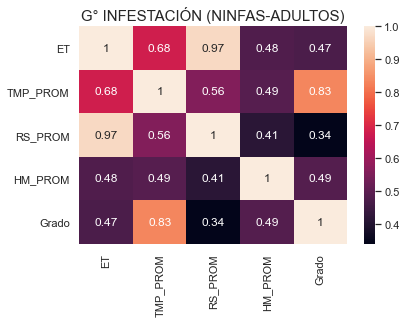

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1313
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


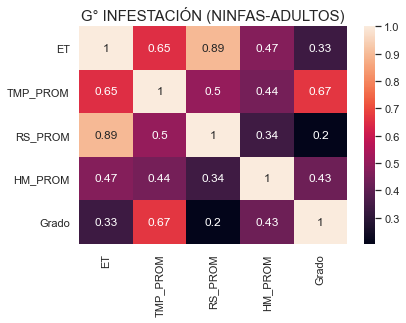

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1311
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


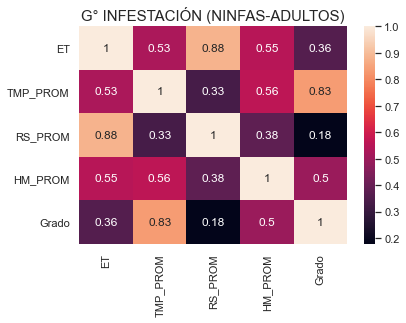

------------------------------------------------------------
Lugar: Filtrado 13 - Turno F13 - Lote 1311
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


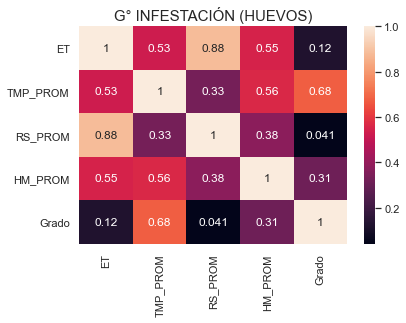

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2919
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


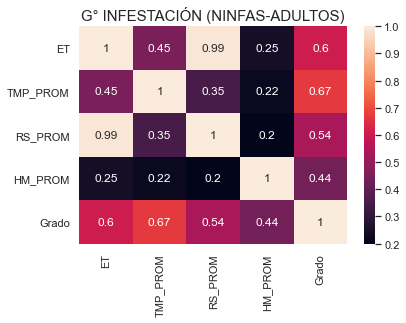

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2919
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


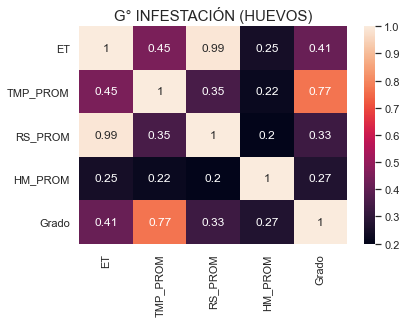

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2940
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


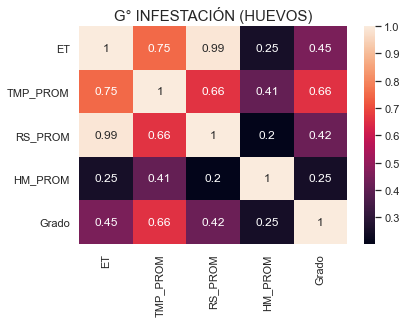

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2911
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


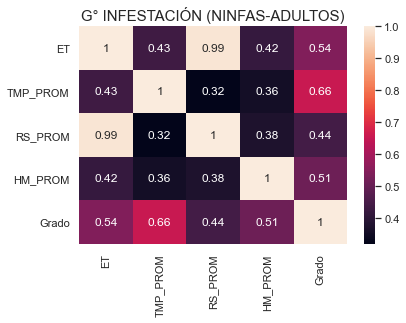

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2911
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


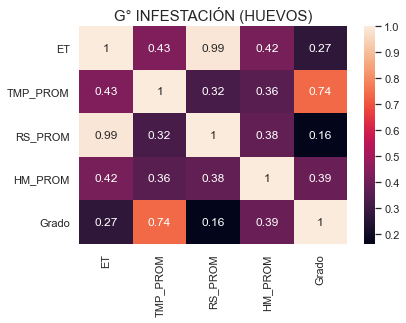

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2916
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


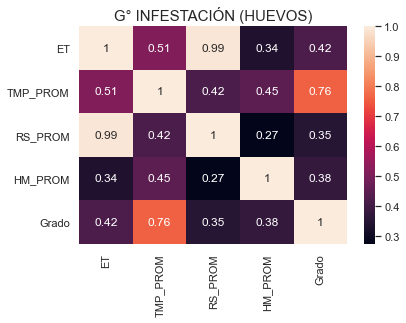

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2916
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


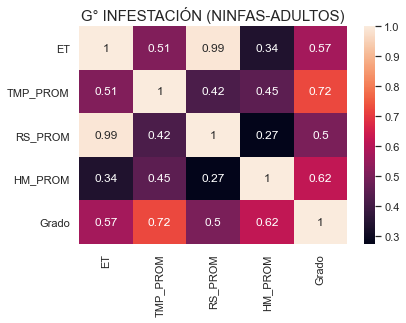

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2915
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


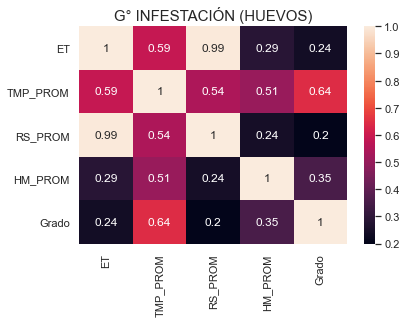

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2915
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


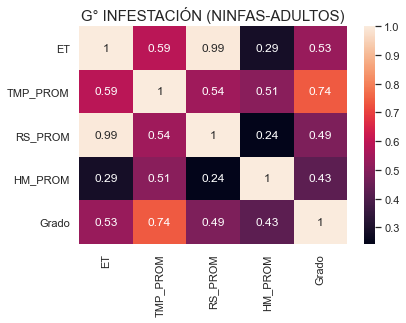

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2908
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


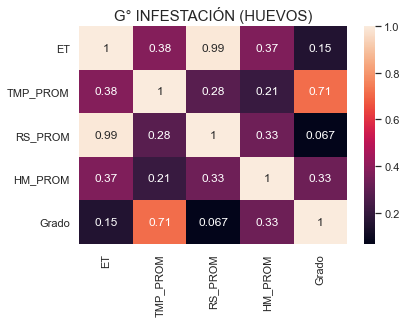

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2908
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


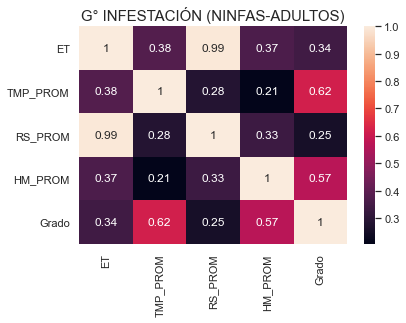

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2934
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


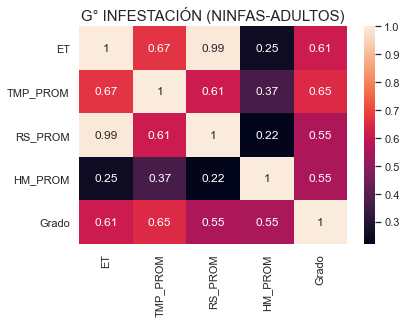

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2934
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


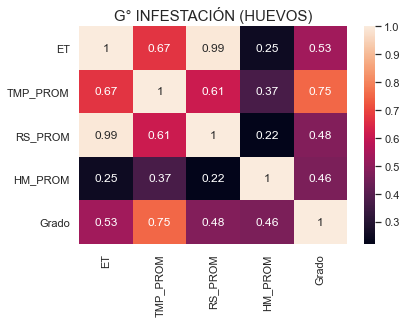

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2914
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


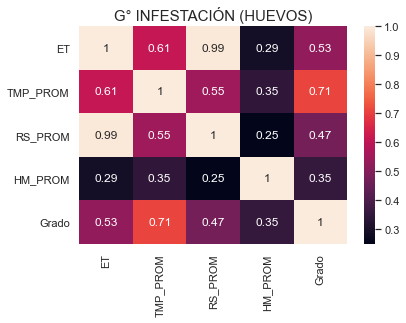

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2914
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


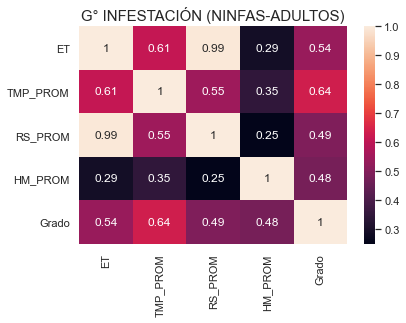

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2933
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


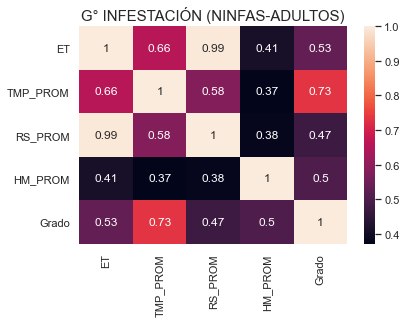

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2933
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


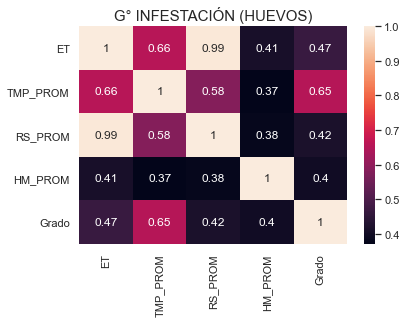

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2909
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


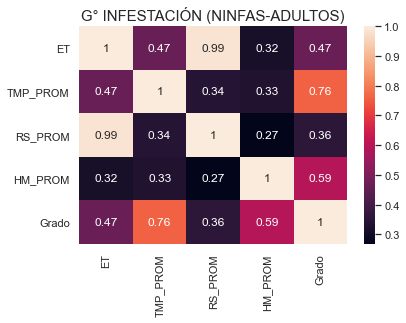

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2909
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


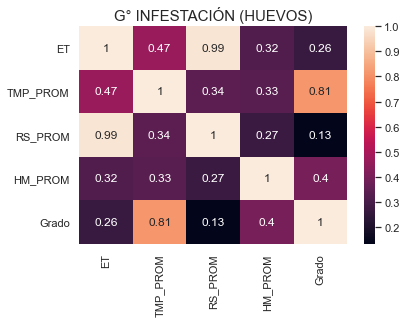

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2925
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


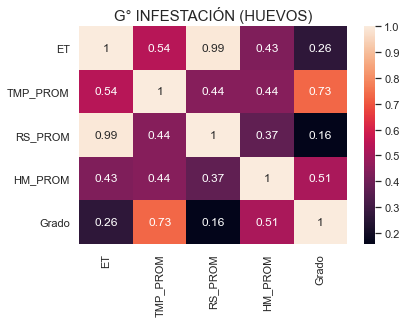

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2925
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


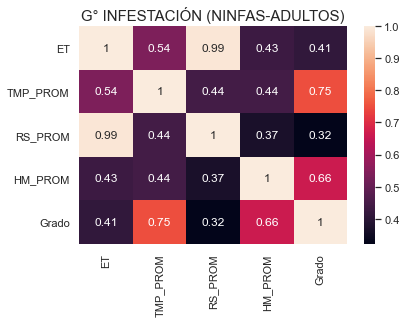

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2939
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


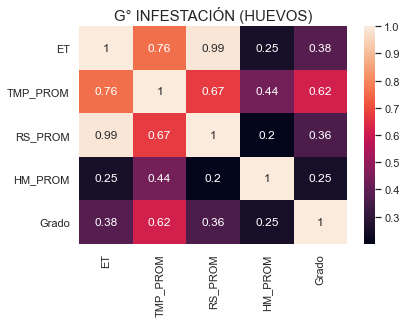

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2918
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


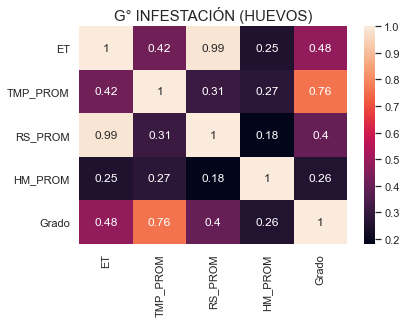

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2918
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


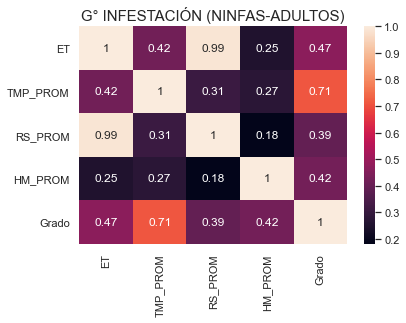

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2927
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


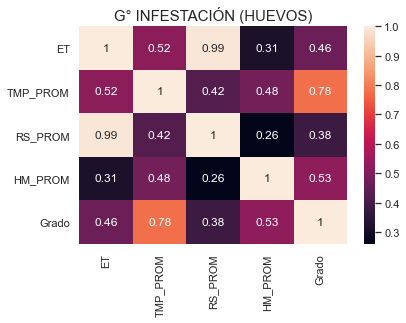

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2927
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


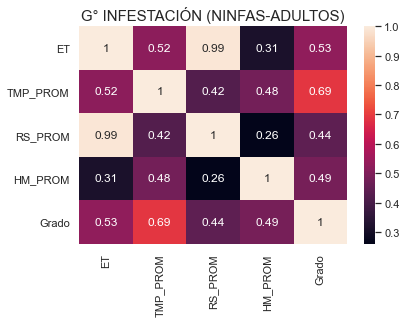

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2924
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


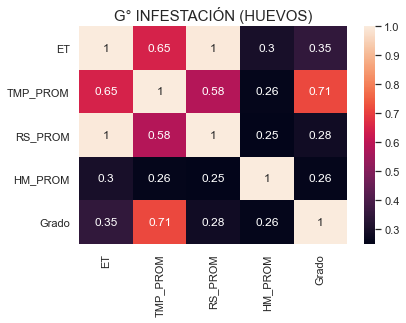

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2938
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


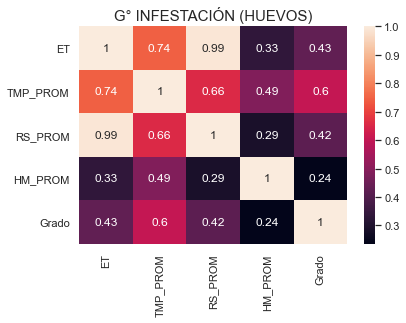

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2929
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


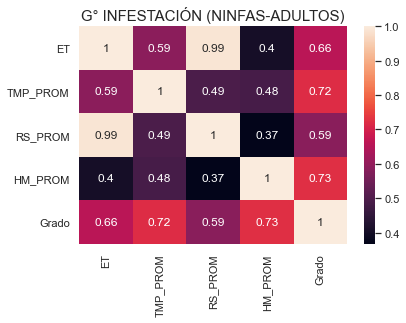

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2929
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


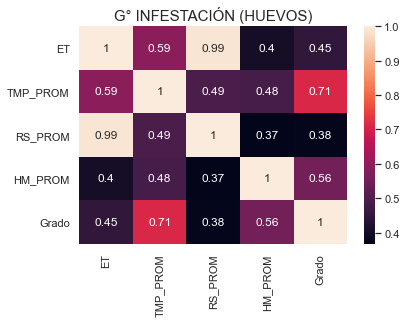

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2910
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


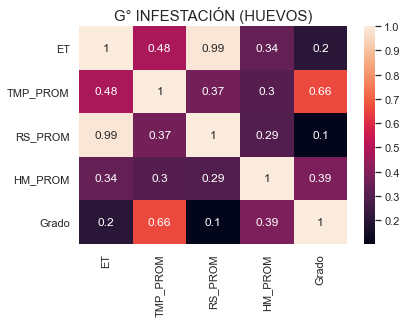

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2910
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


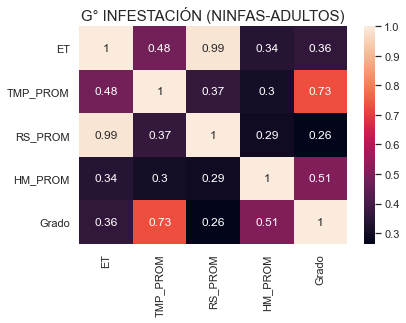

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2923
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


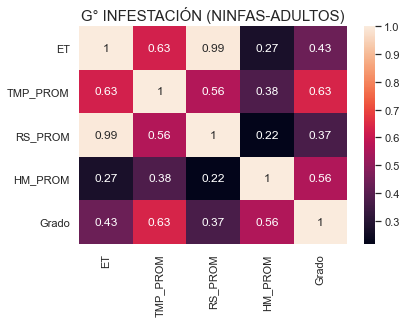

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2923
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


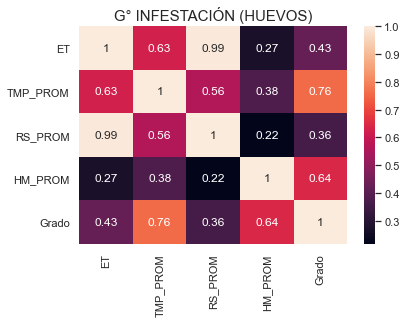

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2930
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


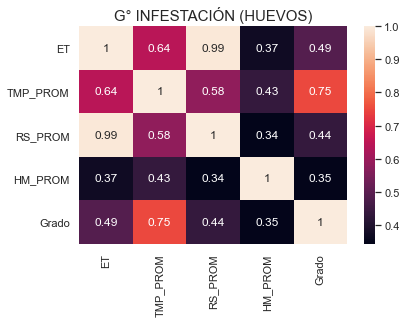

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2931
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


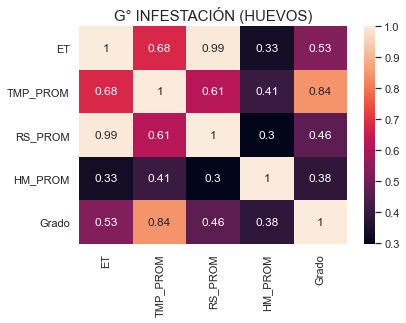

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2931
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


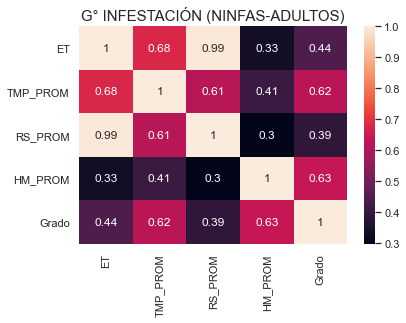

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2920
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


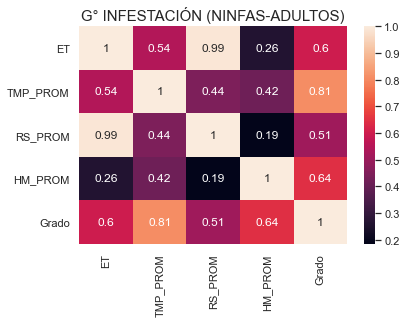

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2920
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


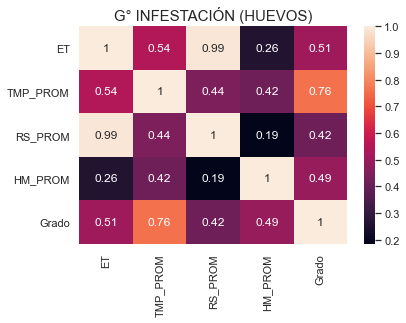

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2928
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


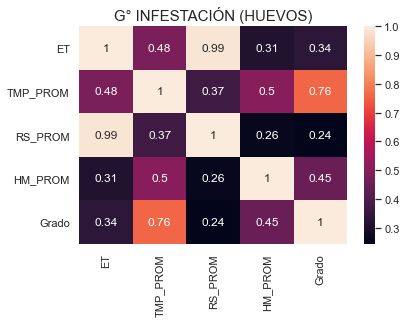

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2928
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


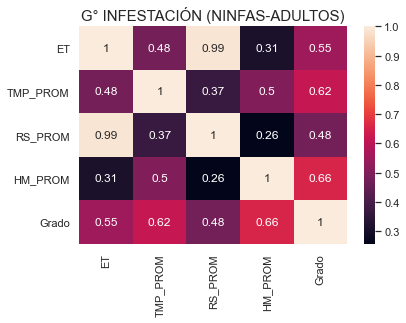

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2912
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


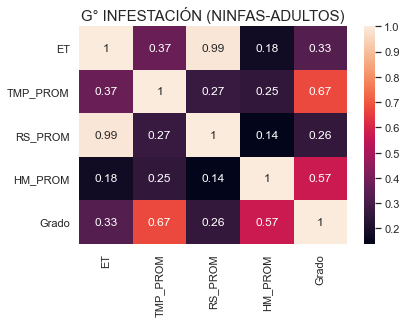

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2912
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


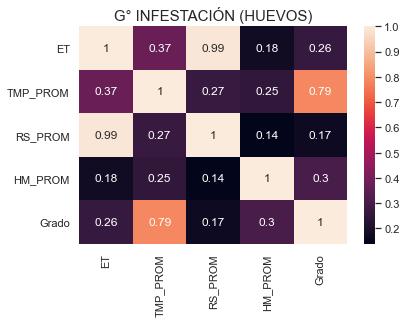

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2921
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


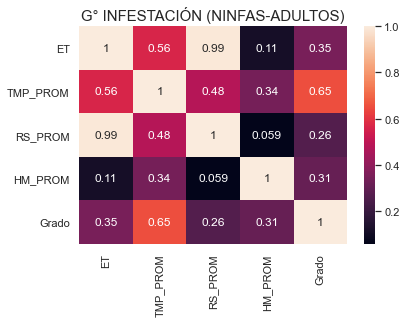

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2921
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


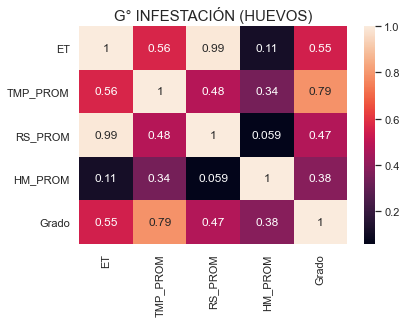

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2907
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


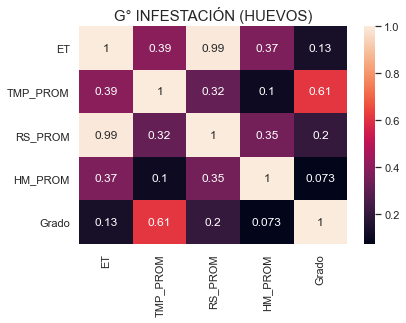

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2935
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


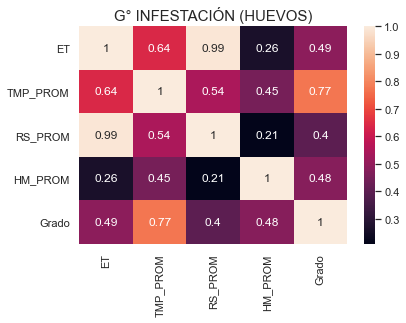

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2935
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


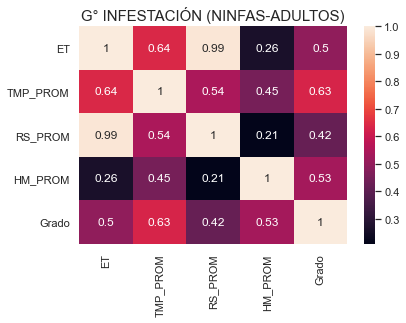

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2906
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


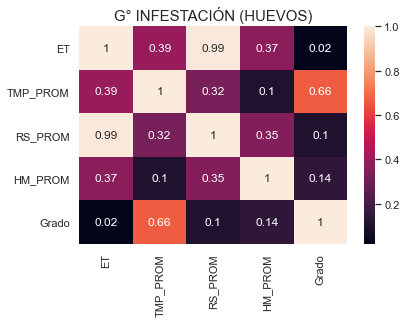

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2906
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


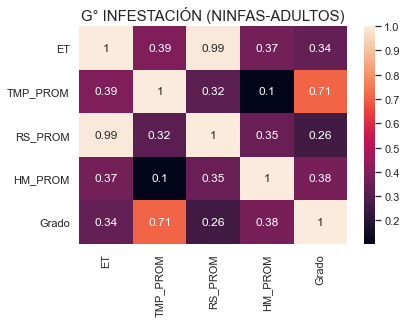

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2913
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


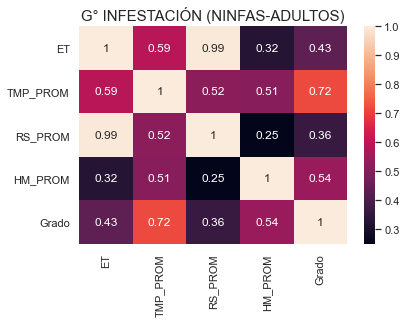

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2913
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


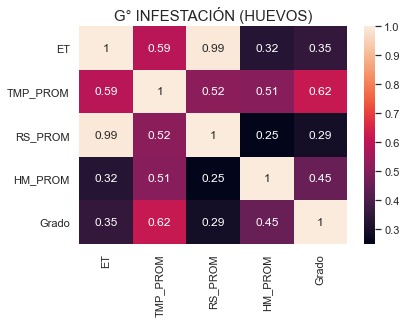

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2917
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


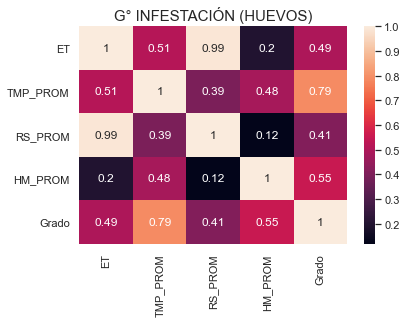

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2917
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


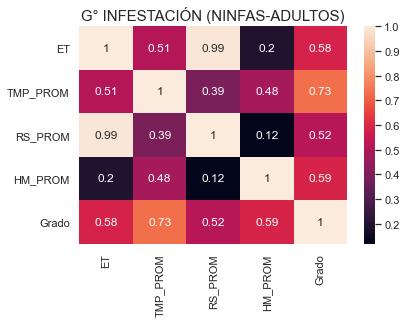

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2926
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


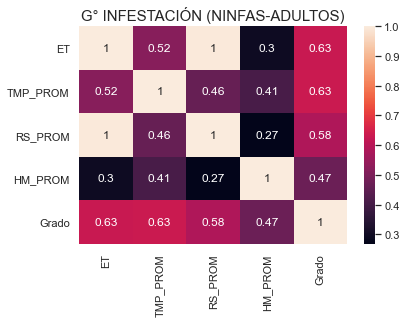

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2926
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


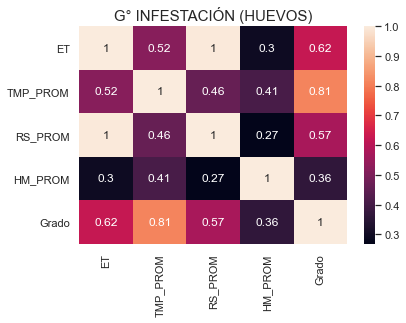

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2936
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


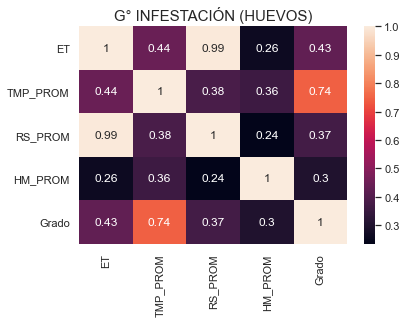

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2936
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


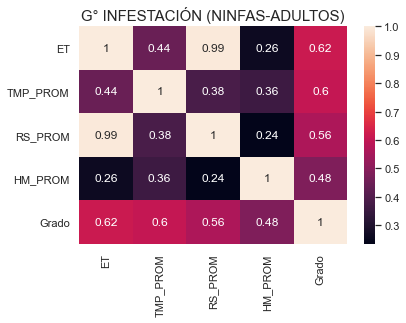

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2932
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


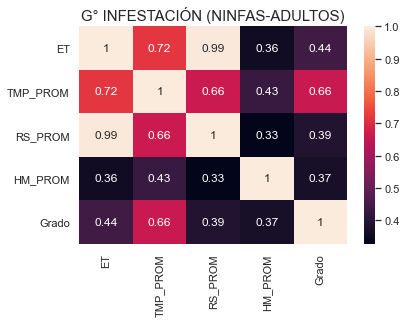

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2932
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


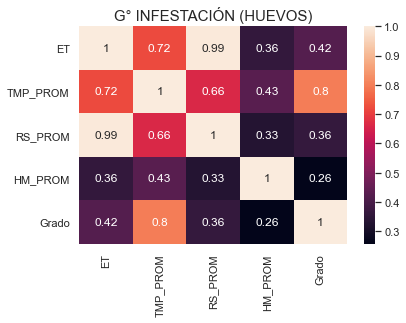

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2937
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


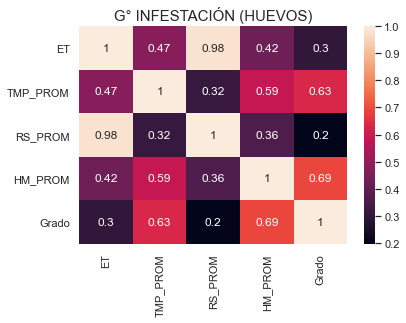

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2937
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


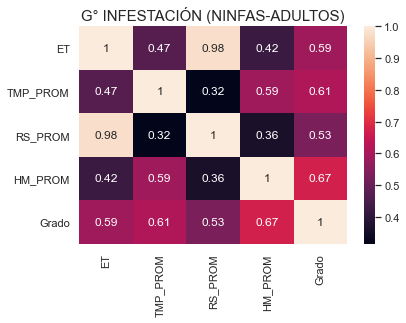

------------------------------------------------------------
Lugar: Filtrado 29 - Turno F29 - Lote 2922
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


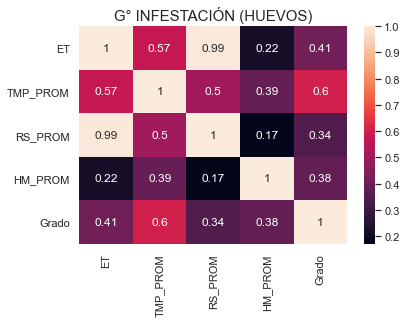

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


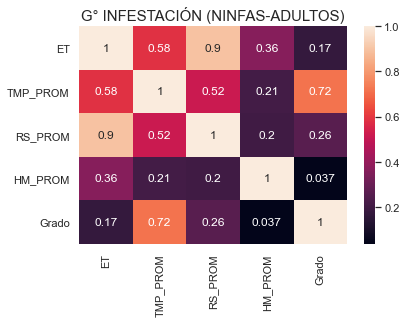

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3007
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


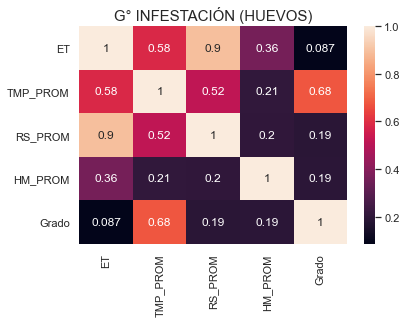

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3007
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


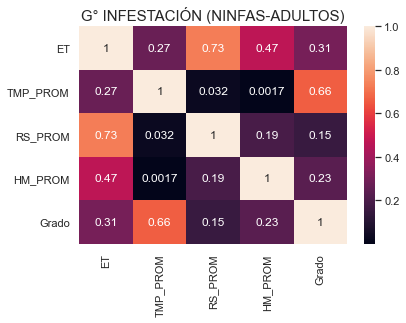

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3024
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


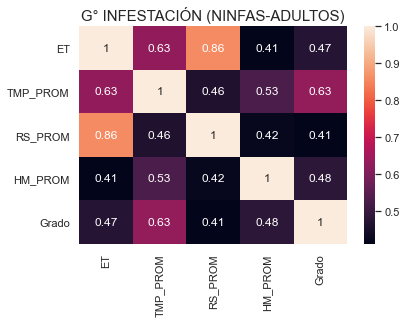

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


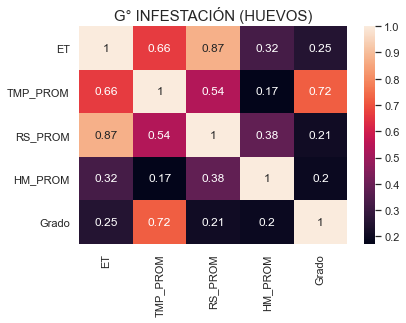

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3008
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


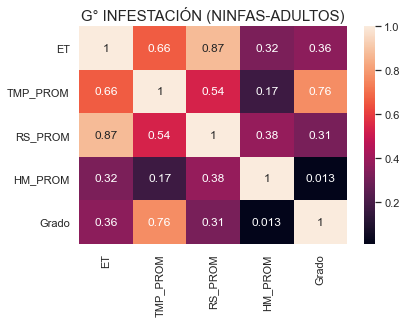

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3008
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


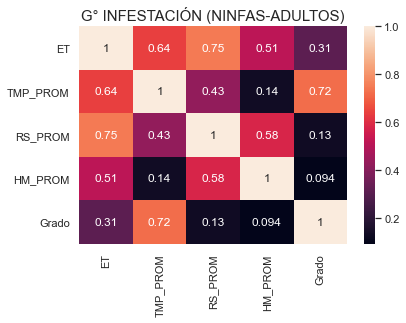

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3001
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


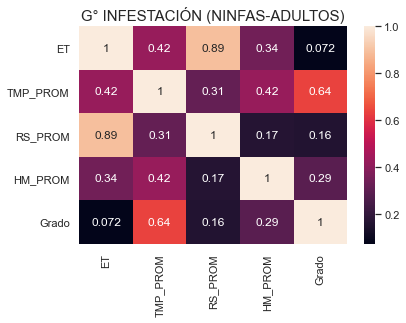

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3001
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


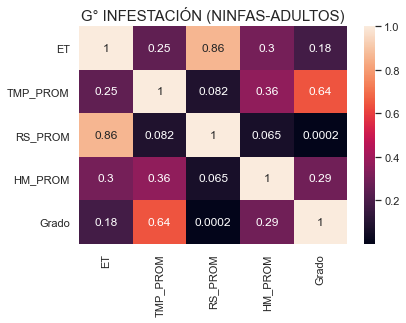

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


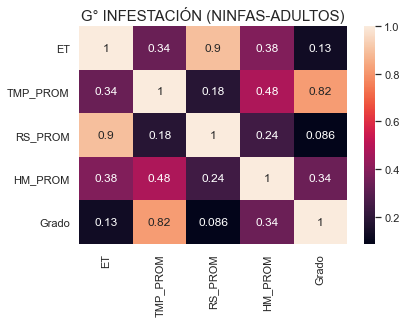

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3014
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


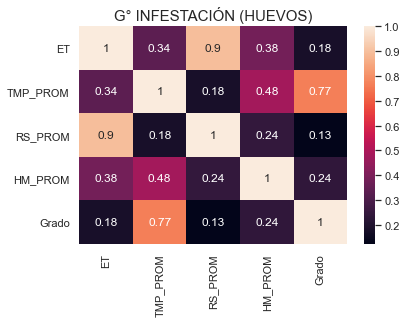

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


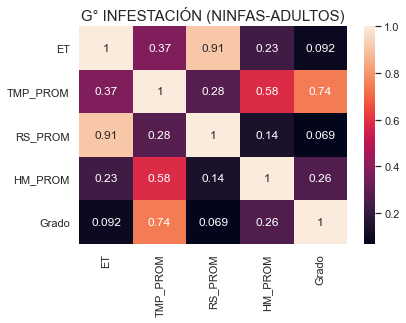

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3015
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


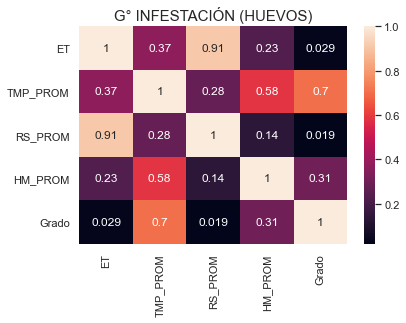

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3022
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


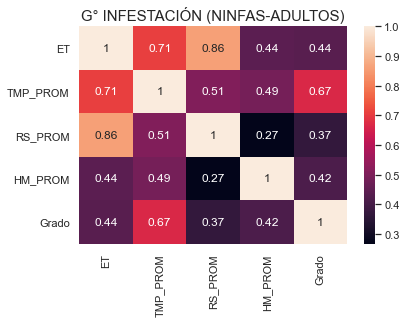

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3022
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


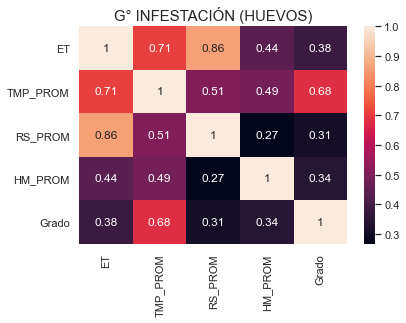

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3028
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


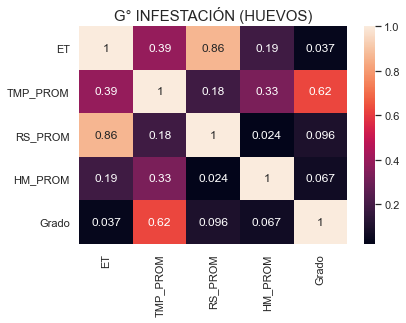

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3017
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


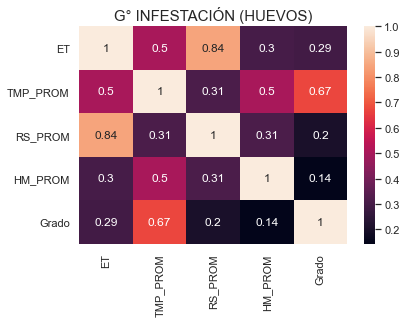

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3005
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


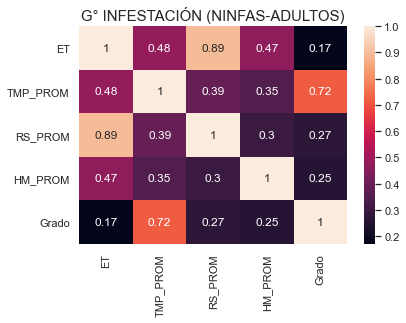

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3005
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


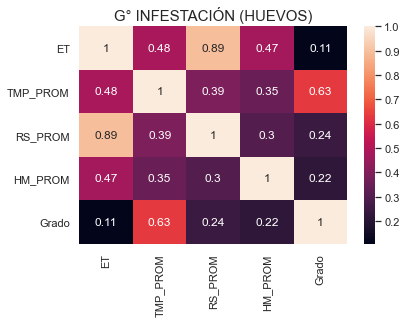

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3005
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


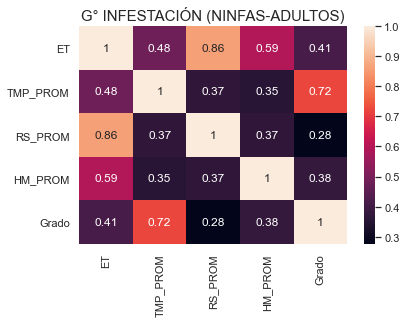

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3019
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


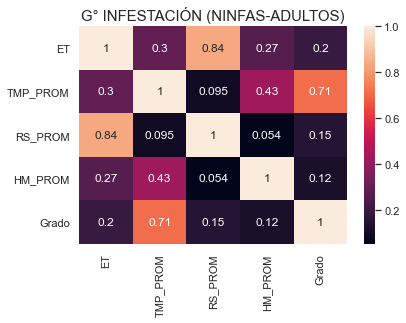

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3019
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


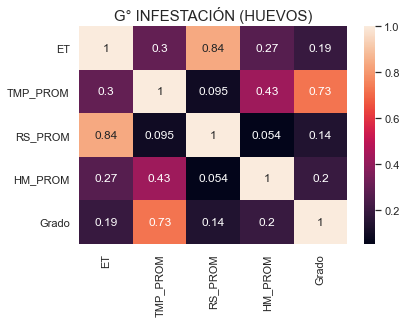

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3011
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


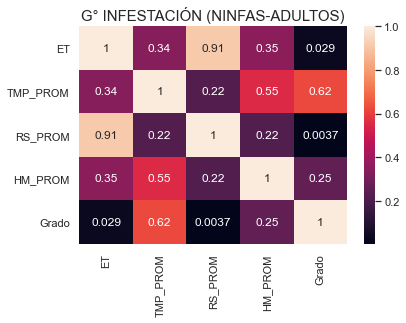

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3023
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


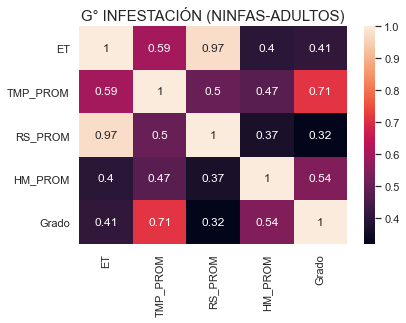

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3026
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


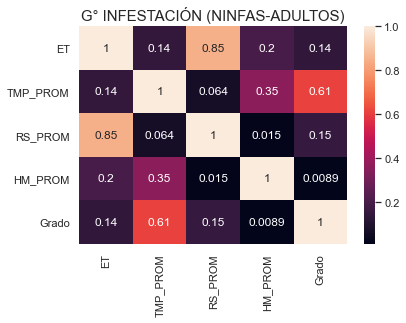

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3003
Plaga:  BEMISIA TABACI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


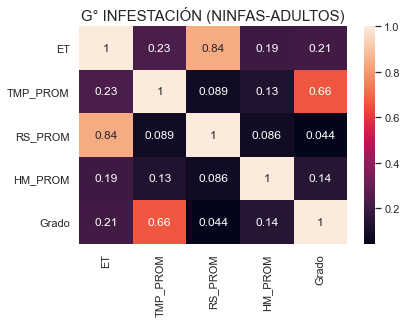

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3009
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


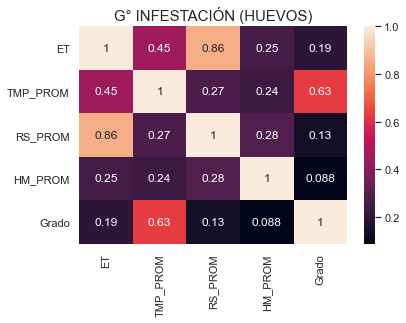

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3009
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


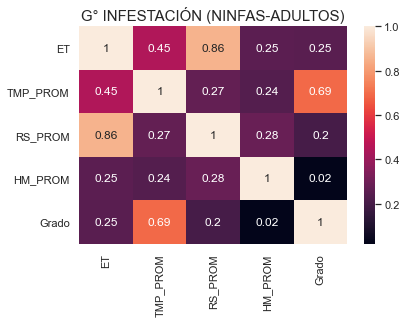

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3012
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


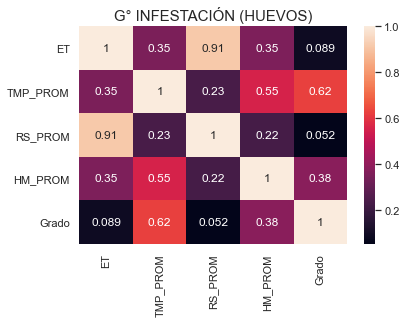

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3012
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


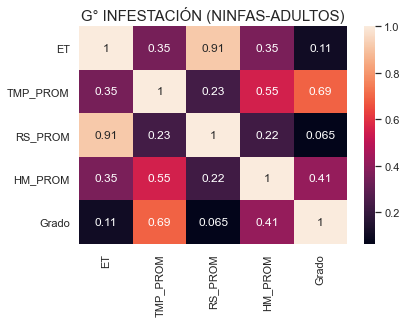

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3027
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


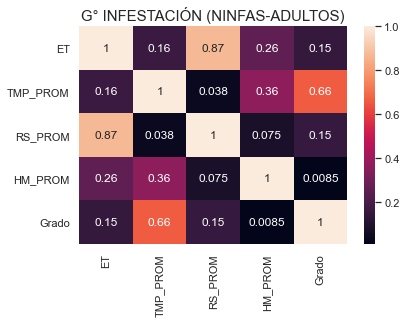

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3027
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


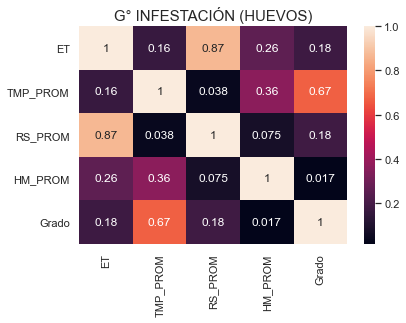

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3020
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


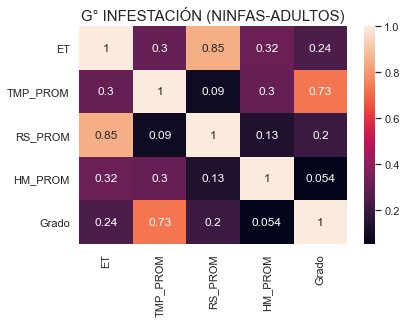

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3020
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


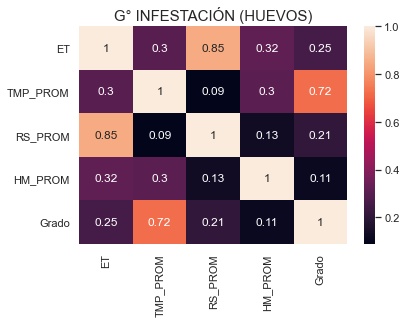

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3021
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


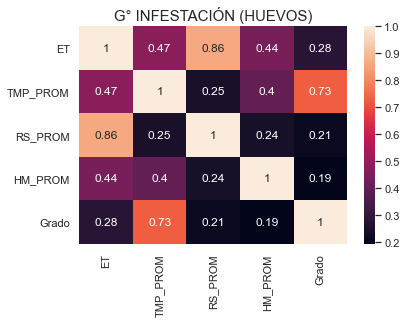

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3021
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


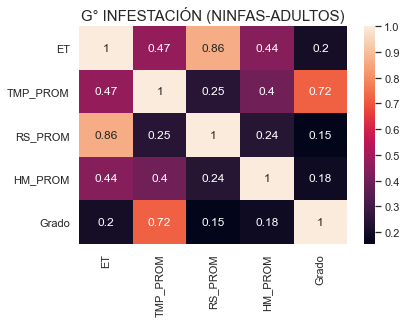

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3016
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


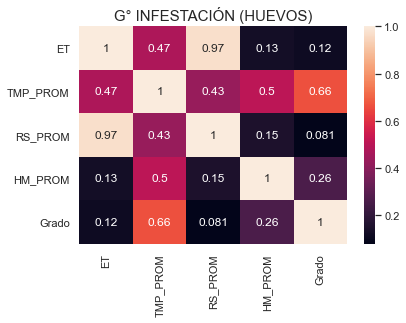

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3031
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


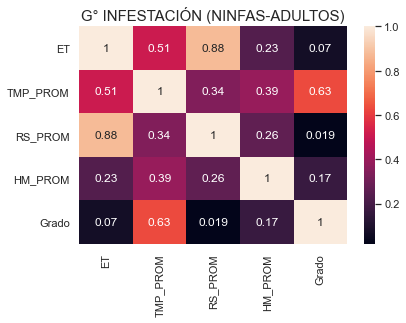

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


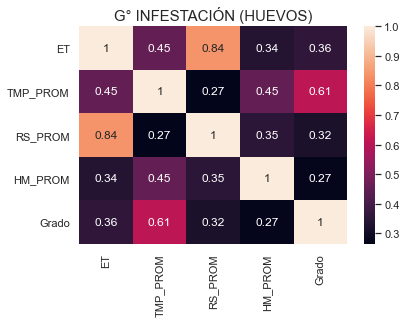

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3010
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


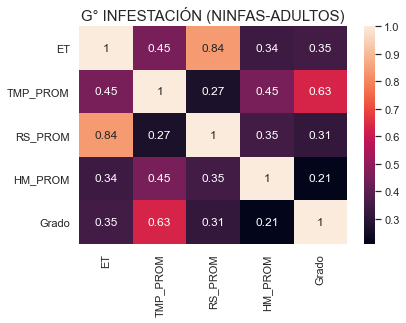

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3013
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


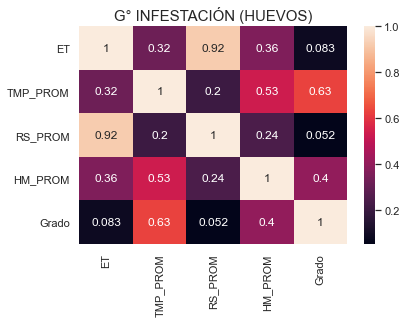

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3013
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


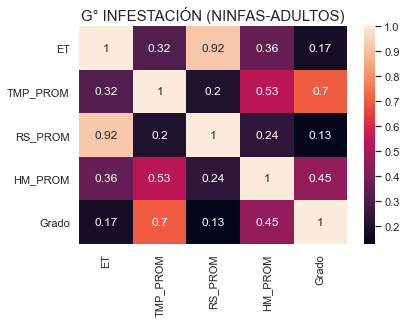

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3018
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


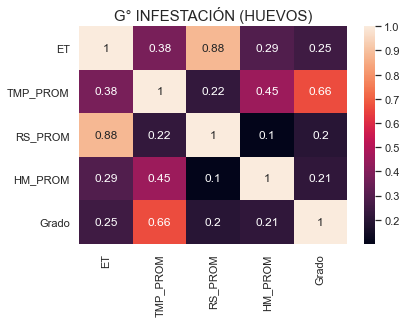

------------------------------------------------------------
Lugar: Filtrado 30 - Turno F30 - Lote 3018
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (NINFAS-ADULTOS)
------------------------------------------------------------


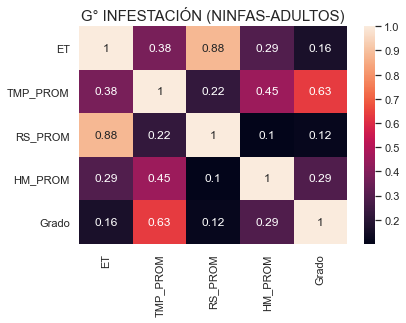

------------------------------------------------------------
Lugar: Filtrado 9N - Turno 11 - Lote 995
Plaga:  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI
Caracteristica:  G° INFESTACIÓN (HUEVOS)
------------------------------------------------------------


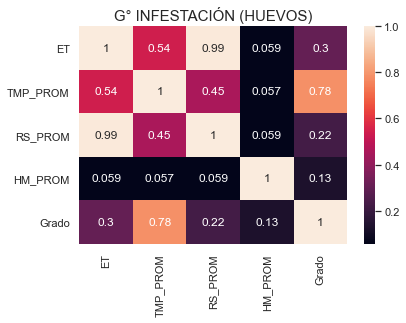

In [10]:
arrPlagas = []
dfFilter = df
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    # Filtrar el dataset por las variables que se usarán
                    #df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Grado']]        
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]   
                    
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1:   
                        
                        dfCorrexLote = dfCorrexLote.append({'Filtrado': filtrado,'Turno': turno,'Lote' : lote, 'Plaga': plaga,'Caracteristica': caracteristica},ignore_index=True)
                        arrPlagas.append(plaga)
                        #Creando Mapa de Calor
                        sns.set()
                        
                        print('------------------------------------------------------------')
                        print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                        print('Plaga: ', plaga)
                        print('Caracteristica: ', caracteristica)      
                        
                        print('------------------------------------------------------------')
                        
                        ax = sns.heatmap(dfCorrelacion, annot = True)
                        iContador = iContador + 1
                        plt.title('{}'.format(caracteristica), fontdict = { 'fontsize' : '15'})
                        plt.show()

In [11]:
arrPlagas = np.array(arrPlagas)
np.unique(arrPlagas)


array(['BEMISIA TABACI', 'OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI'],
      dtype='<U41')

# Entrenamiento de datos

In [12]:
#!pip install statsmodels

In [13]:
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [14]:
dfFilter = df
dfFilter.head()

Evaluador       Fecha         Fundo Filtrado Turno  Lote Grupo_Plaga  \
0      jgil  2019-07-10  VIRU - PALTO      10N  F10N  1031       HOJAS   
1      jgil  2019-07-24  VIRU - PALTO      10N  F10N  1030       HOJAS   
2  hhonores  2019-10-22  VIRU - PALTO      10N  F10N  1006       HOJAS   
3  hhonores  2019-11-01  VIRU - PALTO      10N  F10N  1031       HOJAS   
4   acampos  2019-07-10  VIRU - PALTO      10N  F10N  1006       HOJAS   

                                       Plaga                   Caracteristica  \
0  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI          G° INFESTACIÓN (HUEVOS)   
1  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI          G° INFESTACIÓN (HUEVOS)   
2  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI          G° INFESTACIÓN (HUEVOS)   
3  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI  G° INFESTACIÓN (NINFAS-ADULTOS)   
4  OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI          G° INFESTACIÓN (HUEVOS)   

  Suma Grado Promedio Porcentaje  
0   51     2       --         --  
1   44     2       --         --  
2   35     1       --         --  
3   29     1       --         --  
4   27     1       --         --

In [15]:
dfCorrexLote = pd.DataFrame(columns=['Filtrado', 'Turno', 'Lote', 'Plaga','Caracteristica'])
iContador = 0
for filtrado in arrFiltrados:
    dfFiltrado = dfFilter[dfFilter['Filtrado'] == filtrado]
    arrTurno = dfFiltrado['Turno'].unique()
    for turno in arrTurno:
        dfTurno = dfFiltrado[dfFiltrado['Turno'] == turno]
        arrLote = dfTurno['Lote'].unique()
        for lote in arrLote:  
            dfLote = dfTurno[dfTurno['Lote'] == lote]
            arrPlagaxLote = dfLote['Plaga'].unique()
            for plaga in arrPlagaxLote:
                dfPlaga = dfLote[dfLote['Plaga'] == plaga]
                arrPlagaxCarac = dfPlaga['Caracteristica'].unique()
                for caracteristica in arrPlagaxCarac:
                    dfCarac = dfPlaga[dfPlaga['Caracteristica'] == caracteristica]
                    dfCarac = dfCarac.sort_values(by=['Fecha'])
         
                    dfCarac = dfCarac.groupby(['Fecha','Fundo','Filtrado','Turno','Plaga','Caracteristica'])['Grado'].sum().reset_index()
                    
                    fl_df_weather = df_weather[df_weather['Fecha'].isin(dfCarac['Fecha'])]
                    fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
                    fl_df_weather.reset_index(drop = True, inplace = True)
                    fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})
                    df_union = fl_df_weather.join(dfCarac)
                 
                    #df_union = df_union[['Fecha','ET','TMP_PROM','T_MIN','T_MAX','RS_PROM','HM_PROM','Grado']]        
                    df_union = df_union[['Fecha','ET','TMP_PROM','RS_PROM','HM_PROM','Grado']]        
                                   
                    df_union[["Grado"]] = df_union[["Grado"]].apply(pd.to_numeric)
                
                    dfCorrelacion = df_union.corr().abs()
                    
                    dfCorrelacion_index = dfCorrelacion[dfCorrelacion['Grado'] > 0.60]

                    if dfCorrelacion_index.shape[0] > 1:   
                        
                        arrColumns = dfCorrelacion_index.columns
                        arrColumnsUnion = []
                        ###########################################
                        for column in arrColumns:
                            if (dfCorrelacion_index[column]['Grado'] > 0.60) & (column != 'Grado'):
                                    arrColumnsUnion.append(column)
                        ############################################  
                         #Creando regresión lineal
                        df_union = df_union.drop('Fecha' ,axis=1)
                        df_union = df_union.fillna(df_union.mean())
                        if df_union[arrColumnsUnion].shape[0] > 1:   
                            df_union.to_excel('datasets/{}_{}_{}_{}.xlsx'.format(filtrado,turno,lote,plaga))
                            x = df_union[arrColumnsUnion]
                            y = df_union['Grado']
                            plt.title('F{}- {} - {} - {}'.format(filtrado,turno, lote, plaga))
                            print('------------------------------------------------------------')
                            
                            X_train, X_test, y_train, y_test = train_test_split(x,
                                                                                y, 
                                                                                test_size    = 0.8, 
                                                                                random_state = 1234,
                                                                                shuffle      = True
                                                                               )
                            lrm = LinearRegression()
                            lrm.fit(X_train,y_train)
                            predicciones = lrm.predict(X_test)
                            
                            
                            print('Lugar: Filtrado {} - Turno {} - Lote {}'.format(filtrado,turno, lote))
                            print('Plaga: ', plaga)
                            print('Caracteristica: ', caracteristica)
                            print('Número de datos: ',  x.shape[0])
                            plt.scatter(y_test, predicciones,  color='black')
                    
                            print('Coeficiente: {} '.format(lrm.coef_))
                            print('Variables X:', arrColumnsUnion)
                            print('Intercepción:', lrm.intercept_)
                            print('Coeficiente de determinación R^2:' ,lrm.score(x,y))
                            print('------------------------------------------------------------------')
                            plt.show()
                            
                            
                            print('Predicciones')
                            print('=============')
                            print(plaga)
                            df_predicciones = pd.DataFrame({caracteristica : y_test, 'prediccion' : predicciones})
                            print(df_predicciones)
                            

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/10N_F10N_1030_OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI.xlsx'